## Desafío Empresarial: Análisis de Ventas de Aguacates

En este ejercicio, abordarás un escenario empresarial real relacionado con las ventas de aguacates. Debido al notable aumento en el consumo de aguacates en los últimos años, una cadena de tiendas de comestibles regionales te ha contratado para extraer valiosas percepciones de sus datos de ventas. La tienda desea comprender las tendencias del mercado, las estrategias de precios y los factores que influyen en las ventas de aguacates, con el objetivo de tomar decisiones informadas para mejorar la rentabilidad.

### Introducción al Conjunto de Datos de Aguacate

El conjunto de datos que utilizarás contiene información sobre las ventas de aguacates en diferentes regiones de Estados Unidos, incluyendo detalles como la fecha de venta, el precio promedio, el volumen total vendido y la región.

**Tu Misión:** Utilizando Pandas, realiza un análisis exhaustivo para responder preguntas críticas de negocio. A continuación, se presentan las tareas que deberás cumplir:

### Tareas:

1. **Carga de Datos:** Carga el conjunto de datos de aguacates (`avocado.csv`) en un DataFrame de Pandas y asegúrate de que los datos se han cargado correctamente. Utiliza `info()` para revisar la estructura y los tipos de datos del conjunto.

2. **Exploración de Datos:** Realiza un análisis exploratorio para entender la estructura del conjunto, incluyendo el número de filas y columnas, tipos de datos y valores faltantes. Imprime la cantidad de valores faltantes por columna utilizando `isnull()`.

3. **Análisis de Series de Tiempo:** Examina las ventas de aguacates a lo largo del tiempo. Convierte la columna de fecha a un formato adecuado y agrupa los datos mensuales para visualizar las tendencias de ventas en un gráfico.

4. **Análisis Regional:** Identifica las regiones con mejor rendimiento en términos de volumen de ventas y precios promedio. Esto te permitirá focalizar tus esfuerzos de marketing en áreas clave. Utiliza `groupby()` y `nlargest()` para obtener los resultados.

5. **Tendencias de Precios y Volumen:** Analiza cómo los cambios en los precios de los aguacates afectan el volumen de ventas mediante visualizaciones que ilustren esta relación.

6. **Elasticidad del Precio:** Calcula la elasticidad precio de la demanda para entender cuán sensibles son las ventas a los cambios de precio. Esto se puede hacer analizando las variaciones porcentuales de precio y volumen.

7. **Matriz de Correlación:** Selecciona solo las columnas numéricas del DataFrame y calcula la matriz de correlación para identificar relaciones significativas entre las variables. Utiliza un mapa de calor para visualizar esta correlación de manera efectiva.

8. **Recomendaciones:** Basado en tus hallazgos, proporciona recomendaciones prácticas a la cadena de tiendas de comestibles. Esto puede incluir estrategias de precios, enfoques de marketing y análisis de tendencias estacionales.

### Para Empezar:

Carga el conjunto de datos de aguacates y comienza tu exploración de datos. Utiliza Pandas para la limpieza, visualización y análisis. A medida que avances, documenta tus hallazgos e insights para presentarlos a la gerencia.

Recuerda que Pandas es una herramienta poderosa que puede ayudar a las empresas a tomar decisiones basadas en datos. Este ejercicio te brindará experiencia práctica en análisis de datos y destacará los valiosos insights que se pueden obtener del mundo real.

¡Sumérgete en el mundo de las ventas de aguacates y comienza a formular recomendaciones basadas en datos para impulsar la rentabilidad!


In [13]:
import pandas as pd
import numpy as np
# Cargar conjunto de datos
df = pd.read_csv("avocado.csv")
df_copy=df.copy


In [16]:
# Resumen Estadístico
data_summary = df.describe()
print("\nResumen Estadístico:")
print(data_summary)


Resumen Estadístico:
         Unnamed: 0  AveragePrice  Total Volume          4046          4225  \
count  18249.000000  18249.000000  1.824900e+04  1.824900e+04  1.824900e+04   
mean      24.232232      1.405978  8.506440e+05  2.930084e+05  2.951546e+05   
std       15.481045      0.402677  3.453545e+06  1.264989e+06  1.204120e+06   
min        0.000000      0.440000  8.456000e+01  0.000000e+00  0.000000e+00   
25%       10.000000      1.100000  1.083858e+04  8.540700e+02  3.008780e+03   
50%       24.000000      1.370000  1.073768e+05  8.645300e+03  2.906102e+04   
75%       38.000000      1.660000  4.329623e+05  1.110202e+05  1.502069e+05   
max       52.000000      3.250000  6.250565e+07  2.274362e+07  2.047057e+07   

               4770    Total Bags    Small Bags    Large Bags    XLarge Bags  \
count  1.824900e+04  1.824900e+04  1.824900e+04  1.824900e+04   18249.000000   
mean   2.283974e+04  2.396392e+05  1.821947e+05  5.433809e+04    3106.426507   
std    1.074641e+05  9.862

In [18]:
info = df.info()
print(info)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB
None


In [20]:
nulls = df.isnull() 
print(nulls)

       Unnamed: 0   Date  AveragePrice  Total Volume   4046   4225   4770  \
0           False  False         False         False  False  False  False   
1           False  False         False         False  False  False  False   
2           False  False         False         False  False  False  False   
3           False  False         False         False  False  False  False   
4           False  False         False         False  False  False  False   
...           ...    ...           ...           ...    ...    ...    ...   
18244       False  False         False         False  False  False  False   
18245       False  False         False         False  False  False  False   
18246       False  False         False         False  False  False  False   
18247       False  False         False         False  False  False  False   
18248       False  False         False         False  False  False  False   

       Total Bags  Small Bags  Large Bags  XLarge Bags   type   year  regio

In [35]:
df["Date"] = pd.to_datetime(df["Date"], format='%Y-%m-%d')
df_sorted = df.sort_values(by="Date", ascending=True)

In [36]:
df_sorted

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
11569,51,2015-01-04,1.75,27365.89,9307.34,3844.81,615.28,13598.46,13061.10,537.36,0.00,organic,2015,Southeast
9593,51,2015-01-04,1.49,17723.17,1189.35,15628.27,0.00,905.55,905.55,0.00,0.00,organic,2015,Chicago
10009,51,2015-01-04,1.68,2896.72,161.68,206.96,0.00,2528.08,2528.08,0.00,0.00,organic,2015,HarrisburgScranton
1819,51,2015-01-04,1.52,54956.80,3013.04,35456.88,1561.70,14925.18,11264.80,3660.38,0.00,conventional,2015,Pittsburgh
9333,51,2015-01-04,1.64,1505.12,1.27,1129.50,0.00,374.35,186.67,187.68,0.00,organic,2015,Boise
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8574,0,2018-03-25,1.36,908202.13,142681.06,463136.28,174975.75,127409.04,103579.41,22467.04,1362.59,conventional,2018,Chicago
9018,0,2018-03-25,0.70,9010588.32,3999735.71,966589.50,30130.82,4014132.29,3398569.92,546409.74,69152.63,conventional,2018,SouthCentral
18141,0,2018-03-25,1.42,163496.70,29253.30,5080.04,0.00,129163.36,109052.26,20111.10,0.00,organic,2018,SouthCentral
17673,0,2018-03-25,1.70,190257.38,29644.09,70982.10,0.00,89631.19,89424.11,207.08,0.00,organic,2018,California


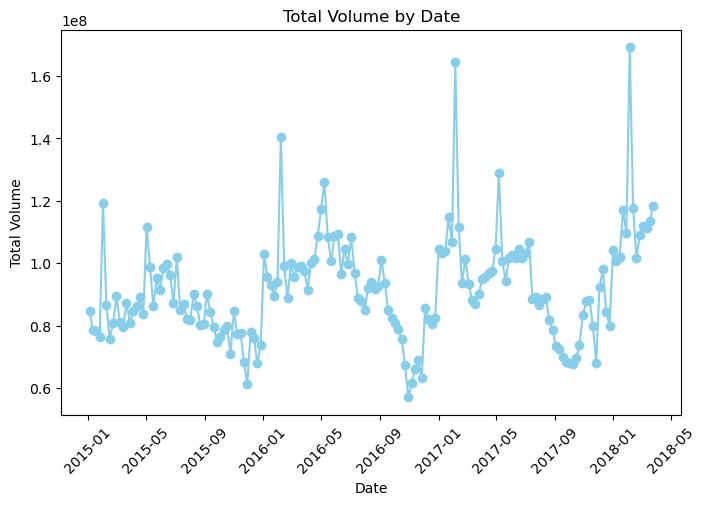

In [53]:

import matplotlib.pyplot as plt

# Assuming df_sorted is the original DataFrame with 'Date' and 'Total Bags' columns

# Group the DataFrame by 'Date' and sum the 'Total Bags' for each date
df_grouped = df_sorted.groupby("Date")["Total Volume"].sum().reset_index()

# Create a line plot using the grouped DataFrame
plt.figure(figsize=(8, 5))

# Line plot
plt.plot(df_grouped["Date"], df_grouped["Total Volume"], color="skyblue", marker='o')

# Optional: Add labels and title
plt.xlabel("Date")
plt.ylabel("Total Volume")
plt.title("Total Volume by Date")

# Rotate the x-axis labels if dates are long
plt.xticks(rotation=45)

# Show the graph
plt.show()


In [56]:
df_grouped = df.groupby("region").agg(
    Volumen_Ventas=('Total Volume', 'sum'),
    Precio_Promedio=('AveragePrice', 'mean')
).reset_index()

# Obtener las 3 regiones con mayor volumen de ventas
top_volumen = df_grouped.nlargest(3, 'Volumen_Ventas')

# Obtener las 3 regiones con mayor precio promedio
top_precio = df_grouped.nlargest(3, 'Precio_Promedio')

# Imprimir los resultados
print("Top 3 Regiones por Volumen de Ventas:")
print(top_volumen)

print("\nTop 3 Regiones por Precio Promedio:")
print(top_precio)

Top 3 Regiones por Volumen de Ventas:
        region  Volumen_Ventas  Precio_Promedio
51     TotalUS    5.864740e+09         1.319024
52        West    1.086779e+09         1.272219
6   California    1.028982e+09         1.395325

Top 3 Regiones por Precio Promedio:
                 region  Volumen_Ventas  Precio_Promedio
17  HartfordSpringfield    5.067054e+07         1.818639
42         SanFrancisco    1.358302e+08         1.804201
28              NewYork    2.407341e+08         1.727574
